In [3]:
import pandas as pd
transaction_data = pd.read_csv("C:/Users/LENOVO/Downloads/TRANSACTION_TAKEHOME.csv")

# Calculating the percentage of missing values in each column


Percentage of Missing Values in Each Column:
RECEIPT_ID         0.000
PURCHASE_DATE      0.000
SCAN_DATE          0.000
STORE_NAME         0.000
USER_ID            0.000
BARCODE           11.524
FINAL_QUANTITY     0.000
FINAL_SALE         0.000
dtype: float64


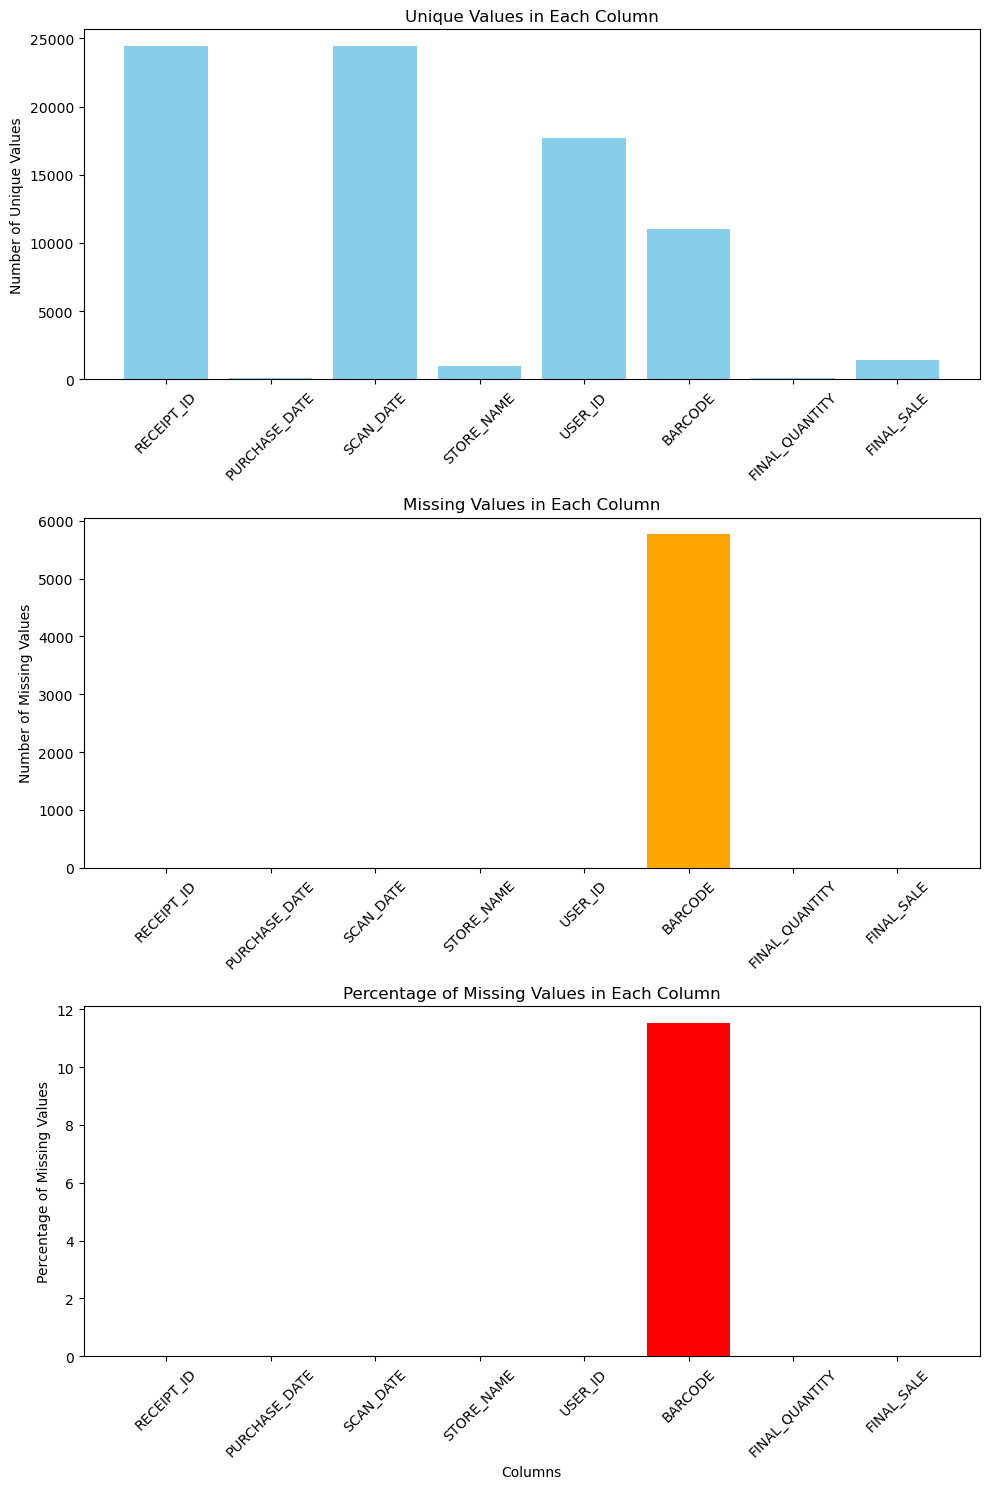

In [8]:
# Calculating the percentage of missing values in each column
import matplotlib.pyplot as plt

missing_values = transaction_data.isnull().sum()
percentage_missing = (missing_values / len(transaction_data)) * 100
unique_values = transaction_data.nunique()
print("Percentage of Missing Values in Each Column:")
print(percentage_missing)


fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].bar(unique_values.index, unique_values.values, color='skyblue')
axs[0].set_title('Unique Values in Each Column')
axs[0].set_ylabel('Number of Unique Values')
axs[0].tick_params(axis='x', rotation=45)

# Plot for missing values
axs[1].bar(missing_values.index, missing_values.values, color='orange')
axs[1].set_title('Missing Values in Each Column')
axs[1].set_ylabel('Number of Missing Values')
axs[1].tick_params(axis='x', rotation=45)

# Plot for percentage of missing values
axs[2].bar(percentage_missing.index, percentage_missing.values, color='red')
axs[2].set_title('Percentage of Missing Values in Each Column')
axs[2].set_ylabel('Percentage of Missing Values')
axs[2].set_xlabel('Columns')
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Checking the percentage of rows with final_quantity that are not integers


In [16]:
# Checking the percentage of rows with final_quantity that are not integers
transaction_data['FINAL_QUANTITY'] = transaction_data['FINAL_QUANTITY'].replace('0', 0).astype(float)

# A value is considered non-integer if it is not equal to its rounded version
condition = transaction_data['FINAL_QUANTITY'] != transaction_data['FINAL_QUANTITY'].round()
percentage_non_integers = (condition.sum() / len(transaction_data)) * 100

print(f"Percentage of records with final quantity that are not integers: {percentage_non_integers:.2f}%")


Percentage of records with final quantity that are not integers: 0.22%


# Creating a new column combining RECEIPT_ID and BARCODE which will act as a primary key


In [10]:
# Creating a new column combining RECEIPT_ID and BARCODE which will act as a primary key
transaction_data['BARCODE'] = transaction_data['BARCODE'].astype(str)
transaction_data['RECEIPT_BARCODE'] = transaction_data['RECEIPT_ID'] + '_' + transaction_data['BARCODE']

# Number of unique values in RECEIPT_BARCODE


In [11]:
# Number of unique values in RECEIPT_BARCODE
unique_receipt_barcodes = transaction_data['RECEIPT_BARCODE'].nunique()
print("Number of unique RECEIPT_BARCODE values:", unique_receipt_barcodes)

Number of unique RECEIPT_BARCODE values: 24795


# Checking cases where both records have FINAL_SALE as '0'


In [12]:
#Checking cases where both records have FINAL_SALE as '0'
transaction_data['FINAL_SALE'] = pd.to_numeric(transaction_data['FINAL_SALE'].fillna(0), errors='coerce')

filtered_data = transaction_data[transaction_data['FINAL_SALE'] == 0.00]
grouped_data = filtered_data.groupby('RECEIPT_BARCODE').size()
result = grouped_data[grouped_data >= 2]
sorted_result = result.sort_index()

print(sorted_result)
print(f"Number of cases where both records have FINAL_SALE as '0': {result.count()}")

RECEIPT_BARCODE
01600cc6-e1f2-4893-8cb2-2c86b3251d57_nan               2
0177084e-6eee-49ff-a349-3c9f00aae953_nan               2
02d06d75-7f79-4e68-b2cf-564b17db823e_311111998989.0    2
0326a774-0077-4378-8828-a780057f21f9_311111885333.0    2
03f8cad3-bb8b-46e9-9cd1-854c29aa2221_nan               2
                                                      ..
f82d0920-84b9-4994-8738-243d16ca9900_nan               2
f8ea145e-6385-4c36-bb96-cd58b3a6fad4_311111224057.0    2
fb317fe2-f853-4cf1-9526-91c4248ad52a_nan               2
fbcc9378-f62f-41a4-a3e4-52b3f574149c_nan               2
fe82362d-9d4f-4df8-be77-e1b87d7cf7ef_78742232331.0     2
Length: 326, dtype: int64
Number of cases where both records have FINAL_SALE as '0': 326


Data Quality Issues
Duplicate Entries:

The receipt ID is duplicated in all cases even if a single product was sold for that receipt id, suggesting that each transaction generates two rows.  For some cases where receipt ID is being duplicated the final quantity is marked as a string “zero” which is incorrect for a numeric column. 

Missing and Invalid Values:

Out of 24,795 unique transactions identified by concatenating receipt id and barcode, 326 transactions, which account for 1.31%, either lack a final sale value or have a final sale value set to zero. This issue impacts the accuracy of reporting and data analysis.

The barcode column itself has 11.52% missing values.

The final quantity column should ideally have values which are integers but there are 0.22% cases where final quantity is not an integer value

Primary Key Complexity:
Given the necessity to use a combination of receipt id and barcode to uniquely define each transaction, the primary key's complexity increases, making it less straightforward for data management and querying.